In [ ]:
import pandas as pd
DF_HR=pd.read_csv('https://raw.githubusercontent.com/Izainea/tutoria_mlii_ean/refs/heads/main/HR.csv')
DF_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Preprocesamiento


In [ ]:
from re import X
## PIPELINE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

## Creación de entrenamiento y testeo

X=DF_HR.drop('left', axis=1)
y=DF_HR['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3035)

### Categorical Features

categorical_features = DF_HR.select_dtypes(include=['object']).columns

categorical_transformation=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='Desconocido')),
    ('dummy',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

X_num_train=categorical_transformation.fit_transform(X_train[categorical_features])

In [ ]:
categorical_transformation.named_steps['dummy'].get_feature_names_out()

array(['x0_IT', 'x0_RandD', 'x0_accounting', 'x0_hr', 'x0_management',
       'x0_marketing', 'x0_product_mng', 'x0_sales', 'x0_support',
       'x0_technical', 'x1_high', 'x1_low', 'x1_medium'], dtype=object)

In [ ]:
## Numerical Transform

numerical_features=X.select_dtypes(include=['int64','float64']).columns

numerical_transformation=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

X_num_train=numerical_transformation.fit_transform(X_train[numerical_features])

pd.DataFrame(X_num_train)



,0,1,2,3,4,5,6
0,-2.107407,0.491844,1.783991,2.065960,1.021928,-0.415012,-0.153439
1,-0.050690,-0.675422,-0.642180,0.824245,-0.337960,-0.415012,-0.153439
2,0.876850,0.783661,0.166544,1.084605,1.021928,-0.415012,-0.153439
3,-0.050690,-1.142329,0.975267,-1.218576,-0.337960,-0.415012,-0.153439
4,0.473572,0.550208,0.975267,-0.557663,-0.337960,-0.415012,-0.153439
...,...,...,...,...,...,...,...
11994,-0.131345,-0.908875,-0.642180,-0.998272,-1.017905,-0.415012,-0.153439
11995,-1.865441,-1.725962,-0.642180,-2.059737,-0.337960,-0.415012,-0.153439
11996,0.594555,-0.150152,0.166544,1.044549,-0.337960,-0.415012,-0.153439
11997,0.392916,-0.208515,-0.642180,0.603941,-1.017905,2.409567,-0.153439


In [ ]:
scaler=numerical_transformation.steps[1][1]
scaler.mean_

array([6.12569381e-01, 7.15727144e-01, 3.79406617e+00, 2.00844654e+02,
       3.49704142e+00, 1.46928911e-01, 2.30019168e-02])

In [ ]:
## Integro con ColumnTransformer

preprocessor=ColumnTransformer(transformers=[
    ('Numerico',numerical_transformation,numerical_features),
    ('Categorico',categorical_transformation,categorical_features)
])

X_train_prep=preprocessor.fit_transform(X_train)

X_train_prep=pd.DataFrame(X_train_prep)
X_train_prep.columns=numerical_features.tolist()+categorical_transformation.named_steps['dummy'].get_feature_names_out().tolist()
X_train_prep

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,x0_IT,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical,x1_high,x1_low,x1_medium
0,-2.107407,0.491844,1.783991,2.065960,1.021928,-0.415012,-0.153439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.050690,-0.675422,-0.642180,0.824245,-0.337960,-0.415012,-0.153439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.876850,0.783661,0.166544,1.084605,1.021928,-0.415012,-0.153439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.050690,-1.142329,0.975267,-1.218576,-0.337960,-0.415012,-0.153439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.473572,0.550208,0.975267,-0.557663,-0.337960,-0.415012,-0.153439,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,-0.131345,-0.908875,-0.642180,-0.998272,-1.017905,-0.415012,-0.153439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11995,-1.865441,-1.725962,-0.642180,-2.059737,-0.337960,-0.415012,-0.153439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11996,0.594555,-0.150152,0.166544,1.044549,-0.337960,-0.415012,-0.153439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11997,0.392916,-0.208515,-0.642180,0.603941,-1.017905,2.409567,-0.153439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
preprocessor

ColumnTransformer(transformers=[('Numerico',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')),
                                ('Categorico',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Desconocido',
                                                                strategy='constant')),
                                                 ('dummy',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['sales', 'salary'], dtype='object'))])

In [ ]:
## Entrenamos una red

# Importaciones básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap


# TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Configuración
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Eager execution: {tf.executing_eagerly()}")

TensorFlow version: 2.18.0
Eager execution: True


In [ ]:
simple_model=Sequential()
simple_model.add(Dense(64,activation='tanh'))
simple_model.add(Dense(32,activation='tanh'))
simple_model.add(Dense(1,activation='sigmoid'))

simple_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

simple_model.fit(X_train_prep,y_train,epochs=100,verbose=1)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7816 - loss: 0.4467
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.2042
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9497 - loss: 0.1658
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9544 - loss: 0.1502
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1419
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1360
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1310
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1266
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9616 - loss: 0.1225
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9627 - loss: 0.1188
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1155
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
## Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred=simple_model.predict(X_train_prep)

y_pred=(y_pred>0.5)

print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.9975831319276607
[[9150   10]
 [  19 2820]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9160
           1       1.00      0.99      0.99      2839

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [ ]:
####

X_test_prep=preprocessor.transform(X_test)

y_pred=simple_model.predict(X_test_prep)

y_pred=(y_pred>0.5)

print(classification_report(y_test,y_pred))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2268
           1       0.95      0.95      0.95       732

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
### Shapley Values

!pip install shap

In [ ]:
import shap
explainer=shap.Explainer(simple_model,X_train_prep)
shap_values=explainer(X_test_prep)

PermutationExplainer explainer: 3001it [04:39, 10.70it/s]                          


In [ ]:
numerical_features.tolist()+categorical_transformation.named_steps['dummy'].get_feature_names_out().tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'x0_IT',
 'x0_RandD',
 'x0_accounting',
 'x0_hr',
 'x0_management',
 'x0_marketing',
 'x0_product_mng',
 'x0_sales',
 'x0_support',
 'x0_technical',
 'x1_high',
 'x1_low',
 'x1_medium']

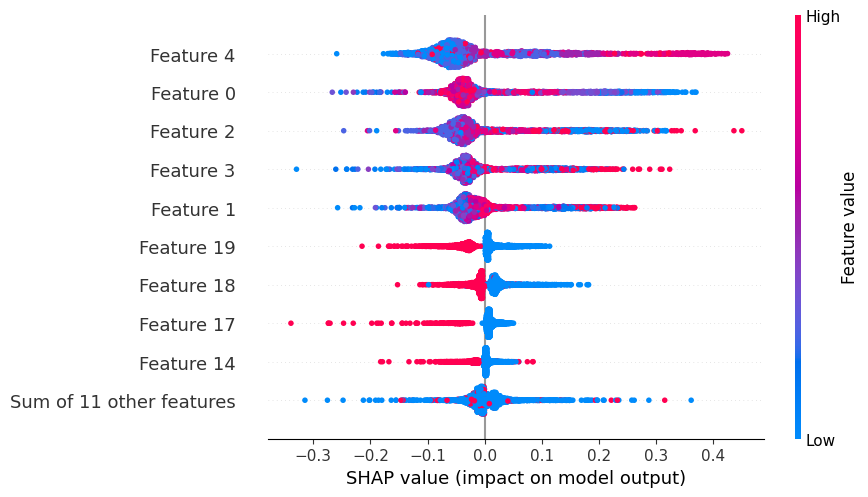

In [ ]:
shap.plots.beeswarm(shap_values)

## Clasificación Multinomial

Ahora trabajaremos con otra base Car Evaluation DataBase se derivó de un modelo de decisión jerárquico simple desarrollado originalmente para la demostración de DEX, M. Bohanec, V. Rajkovic: Sistema experto para la toma de decisiones. Sistemica 1 (1), págs. 145-157, 1990.). El modelo evalúa los coches de acuerdo con la siguiente estructura conceptual:

Aceptabilidad del coche CAR

PRECIO precio total buying : precio de compra maint price: precio de mantenimiento
Características técnicas TECH
CONFORT: comodidad doors: número de puertas persons capacity: personas para llevar lug_boot: el tamaño del maletero safety: seguridad estimada del coche
La base de datos relaciona directamente el automóvil con los seis atributos de entrada: compra, mantenimiento, puertas, personas, maletero, seguridad.

Debido a la estructura de concepto subyacente conocida, esta base de datos puede ser particularmente útil para probar métodos de inducción constructiva y descubrimiento de estructuras.

Información de atributos:

Valores de clase:

unacc, acc, good, vgood

Atributos:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5 or more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

In [4]:
import pandas as pd

DF_car=pd.read_csv('https://raw.githubusercontent.com/Izainea/tutoria_mlii_ean/refs/heads/main/car.data',
                   header=None)
DF_car.columns=['buying','maint','doors','persons','lug_boot','safety','class']
DF_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

X=DF_car.drop('class',axis=1)
y=DF_car['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3035)

In [46]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [47]:
for col in X.columns:

  print(col+': ['+str(X[col].unique())+']')

buying: [['vhigh' 'high' 'med' 'low']]
maint: [['vhigh' 'high' 'med' 'low']]
doors: [['2' '3' '4' '5more']]
persons: [['2' '4' 'more']]
lug_boot: [['small' 'med' 'big']]
safety: [['low' 'med' 'high']]


In [48]:
### Usamos ordinal encoder porque nuestras variables son ordinales

ordinal_cod_bm=OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh']])
ordinal_cod_doors=OrdinalEncoder(categories=[['2', '3', '4', '5more']])
ordinal_cod_persons=OrdinalEncoder(categories=[['2', '4', 'more']])
ordinal_cod_lug_boot=OrdinalEncoder(categories=[['small', 'med', 'big']])
ordinal_cod_safety=OrdinalEncoder(categories=[['low', 'med', 'high']])

preprocessor=ColumnTransformer(transformers=[
    ('buying',ordinal_cod_bm,['buying']),
    ('maint',ordinal_cod_bm,['maint']),
    ('doors',ordinal_cod_doors,['doors']),
    ('persons',ordinal_cod_persons,['persons']),
    ('lug_boot',ordinal_cod_lug_boot,['lug_boot']),
    ('safety',ordinal_cod_safety,['safety'])
])

X_train_prep=preprocessor.fit_transform(X_train)
pd.DataFrame(X_train_prep,columns=X.columns)


,buying,maint,doors,persons,lug_boot,safety
0,2.0,1.0,3.0,0.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,0.0,0.0,1.0,1.0,1.0,2.0
3,3.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,3.0,2.0,2.0,2.0
...,...,...,...,...,...,...
1204,2.0,0.0,3.0,0.0,2.0,1.0
1205,0.0,1.0,3.0,1.0,0.0,2.0
1206,2.0,1.0,2.0,1.0,0.0,0.0
1207,0.0,0.0,0.0,2.0,2.0,1.0


In [49]:
preprocessor

ColumnTransformer(transformers=[('buying',
                                 OrdinalEncoder(categories=[['low', 'med',
                                                             'high',
                                                             'vhigh']]),
                                 ['buying']),
                                ('maint',
                                 OrdinalEncoder(categories=[['low', 'med',
                                                             'high',
                                                             'vhigh']]),
                                 ['maint']),
                                ('doors',
                                 OrdinalEncoder(categories=[['2', '3', '4',
                                                             '5more']]),
                                 ['doors']),
                                ('persons',
                                 OrdinalEncoder(categories=[['2', '4',
                                                             'more']]),
                                 ['persons']),
                                ('lug_boot',
                                 OrdinalEncoder(categories=[['small', 'med',
                                                             'big']]),
                                 ['lug_boot']),
                                ('safety',
                                 OrdinalEncoder(categories=[['low', 'med',
                                                             'high']]),
                                 ['safety'])])

In [50]:
### Entrenamiento del modelo

OHE_ENCODER=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
y_train_prep=OHE_ENCODER.fit_transform(y_train.to_numpy().reshape(-1,1))

pd.DataFrame(y_train_prep,columns=OHE_ENCODER.get_feature_names_out())

,x0_acc,x0_good,x0_unacc,x0_vgood
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
1204,0.0,0.0,1.0,0.0
1205,0.0,1.0,0.0,0.0
1206,0.0,0.0,1.0,0.0
1207,0.0,1.0,0.0,0.0


In [51]:
### Diseñamos la red neuronal

# TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

multi_clas_model=Sequential()
multi_clas_model.add(Dense(16,activation='tanh'))
multi_clas_model.add(Dense(8,activation='tanh'))
multi_clas_model.add(Dense(4,activation='softmax'))

multi_clas_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.002)
,metrics=['accuracy'])

multi_clas_model.fit(X_train_prep,y_train_prep,epochs=100,verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4557 - loss: 1.2444
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7039 - loss: 0.8427
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6997 - loss: 0.7533
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7079 - loss: 0.6817
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7687 - loss: 0.5942
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.5557
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.5220
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7987 - loss: 0.4919
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8154 - loss: 0.4624
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8081 - loss: 0.4502
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8247 - loss: 0.4225
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [52]:
## Evaluamos el modelo
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_test_prep=preprocessor.transform(X_test)
y_test_prep=OHE_ENCODER.transform(y_test.to_numpy().reshape(-1,1))


y_pred=multi_clas_model.predict(X_test_prep)
## Evaluamos el modelo
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_test_prep=preprocessor.transform(X_test)
y_test_prep=OHE_ENCODER.transform(y_test.to_numpy().reshape(-1,1))


y_pred=multi_clas_model.predict(X_test_prep)


y_pred_clas=np.argmax(y_pred,axis=1)

# Get the class names from the OneHotEncoder
class_names = OHE_ENCODER.get_feature_names_out()

# Map the predicted class indices to class names
y_pred_clas = [class_names[i] for i in y_pred_clas]

y_test_clas=np.argmax(y_test_prep,axis=1)
# Map the true class indices to class names
y_test_clas = [class_names[i] for i in y_test_clas]

print(classification_report(y_test_clas,y_pred_clas))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

      x0_acc       0.91      0.86      0.88       114
     x0_good       0.57      1.00      0.72        13
    x0_unacc       0.98      0.97      0.97       367
    x0_vgood       0.96      0.92      0.94        25

    accuracy                           0.94       519
   macro avg       0.85      0.94      0.88       519
weighted avg       0.95      0.94      0.95       519



## Regresor


In [54]:
DF_houses_price=pd.read_csv('https://raw.githubusercontent.com/Izainea/tutoria_mlii_ean/refs/heads/main/houses_price.csv')
DF_houses_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
DF_houses_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [56]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

X=DF_houses_price.drop(['price','id','date','lat','long','zipcode'],axis=1)
y=DF_houses_price['price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3035)

scaler=StandardScaler()
X_train_prep=scaler.fit_transform(X_train)
X_train_prep=pd.DataFrame(X_train_prep,columns=X.columns)
X_train_prep
#

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.693208,0.496031,0.454227,-0.115800,0.929572,-0.083999,-0.308796,-0.622820,1.992652,0.856295,-0.655495,0.713809,-0.205491,1.062492,-0.160129
1,0.693208,1.464014,1.880614,-0.169305,0.929572,-0.083999,-0.308796,-0.622820,1.992652,2.443561,-0.655495,1.155437,-0.205491,0.667561,-0.129998
2,0.693208,0.496031,1.091779,-0.193498,0.929572,-0.083999,-0.308796,-0.622820,1.141143,1.565755,-0.655495,1.019552,-0.205491,1.559811,-0.247398
3,-0.406692,-0.794613,-0.756041,-0.256563,-0.915668,-0.083999,-0.308796,2.447447,-0.561876,-0.490476,-0.655495,-0.373274,-0.205491,-0.575737,-0.137164
4,-1.506591,-1.439936,-1.339562,-0.185940,-0.915668,-0.083999,-0.308796,0.912313,-1.413385,-1.139812,-0.655495,-0.645045,-0.205491,-0.999922,-0.038908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,-0.406692,1.141353,0.270526,-0.261779,0.929572,-0.083999,-0.308796,-0.622820,1.141143,0.158860,0.265643,1.121466,-0.205491,0.506664,-0.331581
15125,-0.406692,-0.471952,-0.539921,0.117630,-0.915668,-0.083999,-0.308796,0.912313,-0.561876,-0.249981,-0.655495,-0.101503,-0.205491,-0.180807,0.266956
15126,0.693208,0.173370,0.551481,0.510173,0.929572,-0.083999,-0.308796,-0.622820,0.289634,0.964518,-0.655495,0.238210,-0.205491,1.003983,0.842344
15127,0.693208,2.109336,2.518166,-0.142335,2.774813,-0.083999,3.630303,-0.622820,2.844161,3.153021,-0.655495,1.019552,-0.205491,0.258004,-0.225351


In [ ]:
y.mean()

In [ ]:
regresor_model=Sequential()

regresor_model.add(Dense(64,activation='relu'))
regresor_model.add(Dense(32,activation='relu'))
regresor_model.add(Dense(16,activation='relu'))
regresor_model.add(Dense(8,activation='relu'))
regresor_model.add(Dense(1,activation='linear'))

regresor_model.compile(loss='mse',optimizer=Adam(learning_rate=0.002),metrics=['mae'])

regresor_model.fit(X_train_prep,y_train,epochs=100,verbose=1)

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 375533469696.0000 - mae: 493800.5625
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 69353070592.0000 - mae: 186950.2812
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 48226787328.0000 - mae: 152143.2188
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 48697679872.0000 - mae: 144634.5469
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 43540746240.0000 - mae: 137567.6406
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 41236729856.0000 - mae: 134275.7969
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 43264843776.0000 - mae: 136356.3594
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 40202395648.0000 - mae: 130886.1719
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 41321050112.0000 - mae: 132836.3438
Epoch 10/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 40946421760.0000 - mae: 132214.0469
Epoch 11/100
473/473 ━━━━